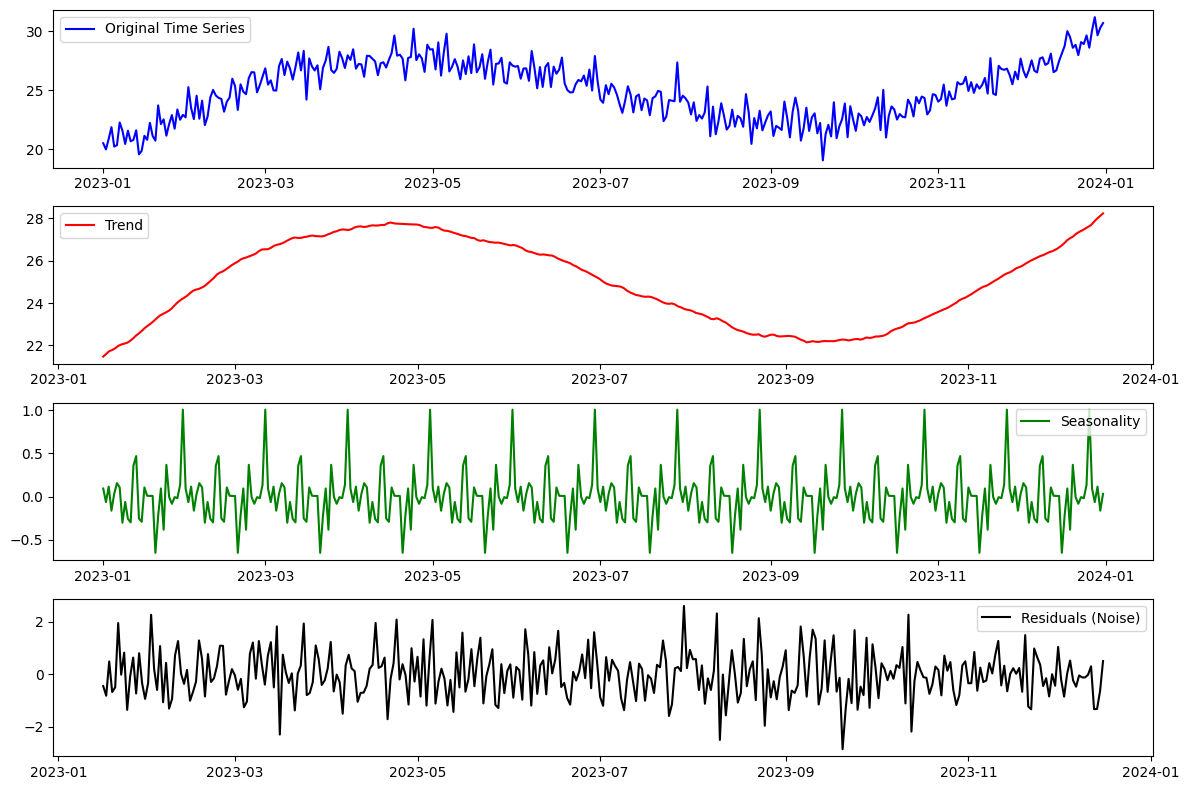

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic time-series data
np.random.seed(42)
days = 365  # Number of days
date_range = pd.date_range(start='2023-01-01', periods=days, freq='D')

# Generate temperature data with a trend + seasonal pattern + noise
trend = np.linspace(20, 30, days)  # Gradual increase in temperature (trend)
seasonality = 5 * np.sin(np.linspace(0, 2 * np.pi, days))  # Seasonal variation
noise = np.random.normal(0, 1, days)  # Random noise
temperature = trend + seasonality + noise  # Final temperature data

# Create DataFrame
data = pd.DataFrame({'Date': date_range, 'Temperature': temperature})
data.set_index('Date', inplace=True)

# Apply Seasonal Decomposition
decomposition = seasonal_decompose(data['Temperature'], model='additive', period=30)  # Monthly seasonality

# Plot decomposition results
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Temperature'], label="Original Time Series", color="blue")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals (Noise)", color="black")
plt.legend()

plt.tight_layout()
plt.show()
